<a href="https://colab.research.google.com/github/shashankbhatia15/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

**Problem Statement**

---


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

In [277]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [278]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [279]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECTS/YES BANK STOCK CLOSING PRICE PREDICTION - SHASHANK BHATIA/data_YesBank_StockPrices.csv')

# **DATA OVERVIEW**

In [280]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [281]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [282]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [284]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [285]:
df.shape

(185, 5)

# **DATA INFORMATION**


---
We have 185 rows and 4 columns in our dataset with no null values.Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the investment made.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression techniques.

In [286]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA AND Data Pre-Processing**

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [287]:
dep_var=df1[['High','Low','Open']]
indep_var=df1['Close']

**HANDLING DATE**

In [288]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [289]:
#set date as index
df1.set_index('Date',inplace=True)

In [290]:
#check if changes are being reflected
df1.head(1)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.0,14.0,11.25,12.46


**CHECK AND HANDLE DUPLICATES**

In [291]:
#check duplicate entries
len(df1[df1.duplicated()])

0

No duplicates in the data

**UNIVARIATE ANALYSIS**

INDEPENDANT VARIABLES

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

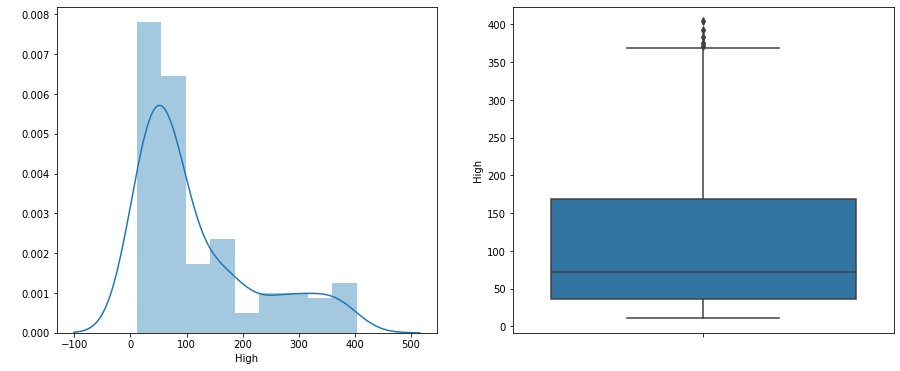

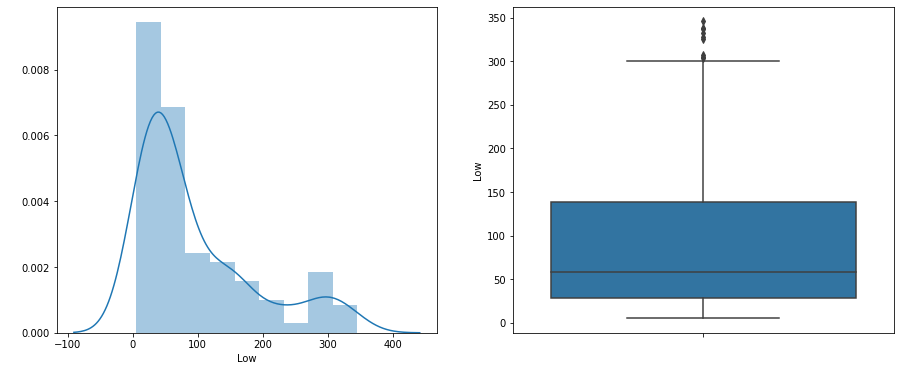

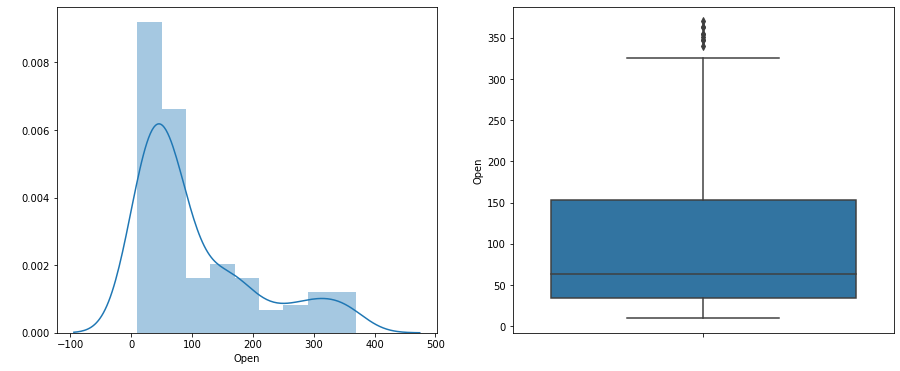

In [292]:
for var in dep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)


DEPENDANT VARIABLE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Open')

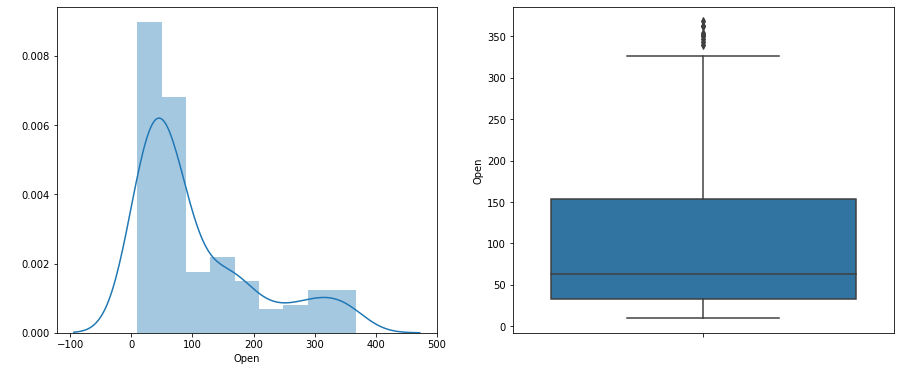

In [293]:

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)

LOG TRANSFORMATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

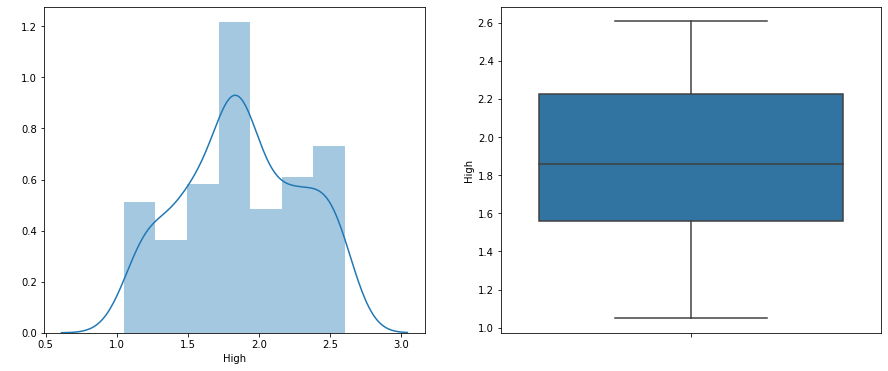

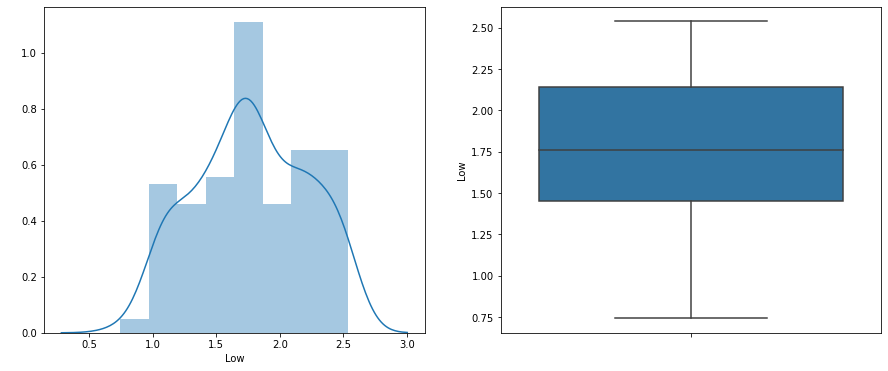

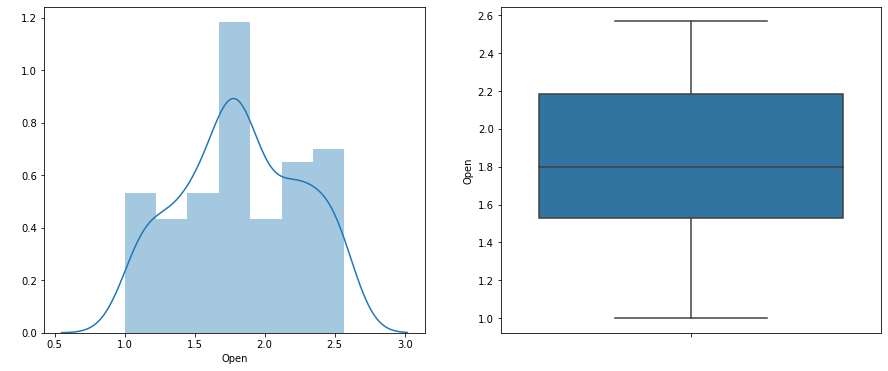

In [294]:
#log 
for var in dep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

minmax scaler

**BIVARIATE ANALYSIS**

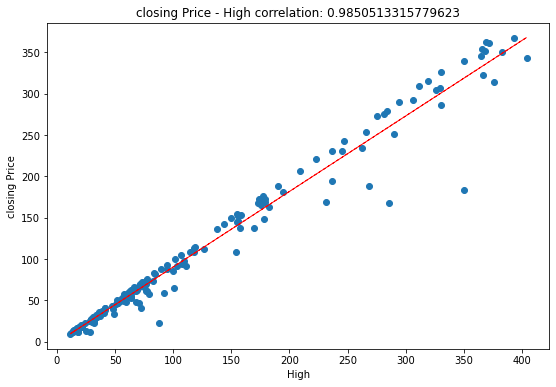

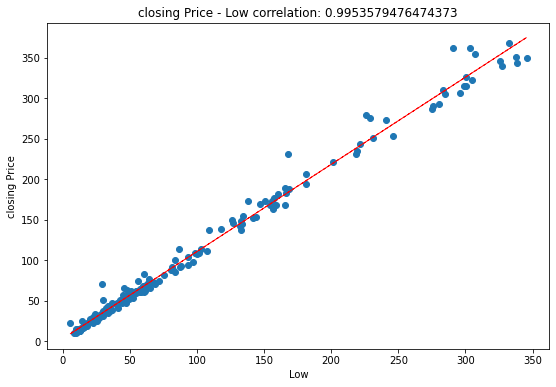

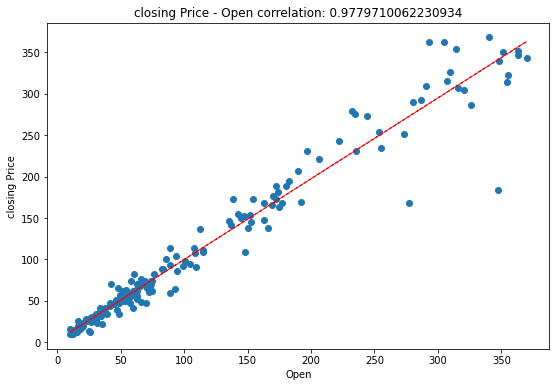

In [295]:
for col in dep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

**CORRELATION**

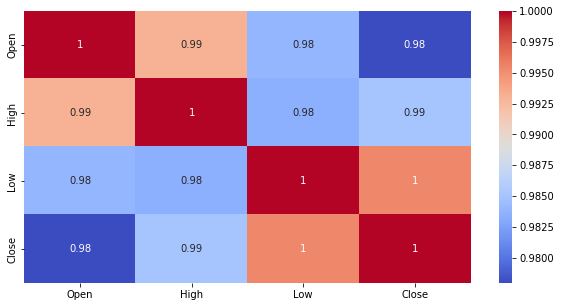

In [296]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

In [297]:
#Multicollinearity

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [298]:
calc_vif(dep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


***DATAFRAME TO STORE EVALUATION METRICS ***

In [299]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

**DATA BIFURCATION**

In [300]:
#dependent and independent variables split
dep_var=df1[['High','Low','Open']]
indep_var=df1['Close']

# **LINEAR REGRESSION**

In [301]:
#TRAIN-TEST data split

x_train, x_test,y_train, y_test = train_test_split(np.log10(dep_var),np.log10(indep_var),test_size=.20,random_state=1)
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


In [302]:
# Fitting Multiple Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [303]:
#predictions
y_pred = reg.predict(x_test)

In [304]:
reg.score(x_train, y_train)

0.9948378417468651

In [305]:
reg.coef_

array([ 0.85470307,  0.70624523, -0.56089497])

**EVALUATION**

In [306]:
#evaluation metrics
MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(10**(y_test),10**(y_pred))
print('R2 : ',r2)

adj_r2=1-(1-r2_score(10**(y_test), 10**(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)
c


MAE : 3.16745509028831
MSE : 20.617846376984083
RMSE : 4.540687874869191
R2 :  0.9977732938508455
Adjusted R2 :  0.9975708660191042


In [307]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i+=1

In [308]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571


**VISUALIZATION**

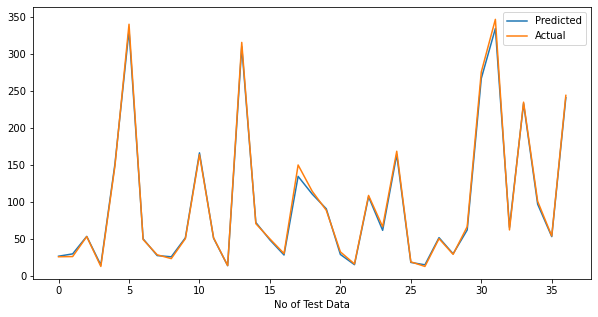

In [309]:
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Hetroscadacity**

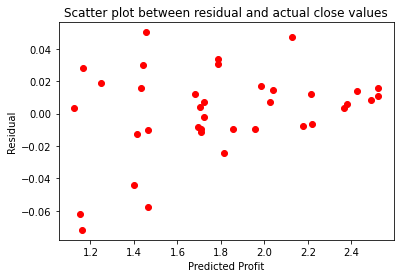

In [310]:
# Plotting scatter plot between residual and fitted values
residual= y_test-y_pred
plt.scatter(y_pred, residual,c='red')
plt.title('Scatter plot between residual and actual close values')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

MINMAX

In [311]:
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [312]:
# Fitting Multiple Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [313]:
#predictions
y_pred = reg.predict(x_test)

In [314]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 3.052764712964646
MSE : 19.988578593595022
RMSE : 4.470858820584142
0.9978412541225983
Adjusted R2 :  0.9976450044973799


In [315]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='linear regression - MINMAX'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i+=1

log+minmax

In [350]:
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)


In [351]:
# Fitting Multiple Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [352]:
#predictions
y_pred = reg.predict(x_test)

In [353]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 3.0527647129646414
MSE : 19.98857859359491
RMSE : 4.470858820584129
0.9978412541225983
Adjusted R2 :  0.9976450044973799


In [354]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='linear regression - no true trans'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i+=1

In [355]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571
1,linear regression - MINMAX,3.05,19.99,4.47,0.997841,0.997645
2,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645
3,xgboost(man),4.33,33.55,5.79,0.996376,0.996047
4,xgboost_2,4.26,32.91,5.74,0.996445,0.996122
5,KNN - NORMAL,3.85,31.12,5.58,0.996639,0.996334
6,KNN - LOG,4.60,49.75,7.05,0.994627,0.994139
7,KNN - MINMAX,4.10,37.73,6.14,0.995925,0.995555
8,xgb log,4.50,35.77,5.98,0.996137,0.995786
9,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645


# **LASSO**

In [356]:
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)

In [357]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [359]:
lasso.score(x_train, y_train)

0.9943947120445369

In [ ]:
lasso.coef_

array([0.95764811])

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

In [362]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -62.90049172560616


In [364]:
y_pred = lasso_regressor.predict(x_test)

In [365]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 3.130856893860506
MSE : 20.878651216190214
RMSE : 4.569316274475889
0.9977451271971334
Adjusted R2 :  0.9975401387605092


In [366]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='lasso'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

In [367]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571
1,linear regression - MINMAX,3.05,19.99,4.47,0.997841,0.997645
2,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645
3,xgboost(man),4.33,33.55,5.79,0.996376,0.996047
4,xgboost_2,4.26,32.91,5.74,0.996445,0.996122
5,KNN - NORMAL,3.85,31.12,5.58,0.996639,0.996334
6,KNN - LOG,4.60,49.75,7.05,0.994627,0.994139
7,KNN - MINMAX,4.10,37.73,6.14,0.995925,0.995555
8,xgb log,4.50,35.77,5.98,0.996137,0.995786
9,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645


# **RIDGE**

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.8881488146703688

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -1267.3016429706834


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

# **XGBOOST**

manual

In [321]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

In [322]:
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='neg_mean_absolute_error')
xgb_grid.fit(x_train,y_train)

In [324]:
print("The best fit alpha value is found out to be :" ,xgb_grid.best_params_)
print("\nUsing ",xgb_grid.best_params_, " the negative mean squared error is: ", xgb_grid.best_score_)

The best fit alpha value is found out to be : {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

Using  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}  the negative mean squared error is:  -6.86396415789374


In [325]:
y_pred = xgb_grid.predict(x_test)

In [326]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 4.331598878808923
MSE : 33.55247679101334
RMSE : 5.792449981744628
0.9963763671033403
Adjusted R2 :  0.9960469459309167


In [327]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='xgboost(man)'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

In [328]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571
1,linear regression - MINMAX,3.05,19.99,4.47,0.997841,0.997645
2,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645
3,xgboost(man),4.33,33.55,5.79,0.996376,0.996047


In [329]:
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

[06:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [330]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

In [331]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 4.25945175686398
MSE : 32.91328663051823
RMSE : 5.737010251909807
0.9964453989815895
Adjusted R2 :  0.9961222534344613


In [332]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='xgboost_2'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

In [333]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571
1,linear regression - MINMAX,3.05,19.99,4.47,0.997841,0.997645
2,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645
3,xgboost(man),4.33,33.55,5.79,0.996376,0.996047
4,xgboost_2,4.26,32.91,5.74,0.996445,0.996122


# **KNN**

In [334]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_
y_pred=model.predict(x_test)

In [335]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 3.8548648648648656
MSE : 31.116397297297286
RMSE : 5.578207355172205
0.9966394611767613
Adjusted R2 :  0.996333957647376


In [336]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN - NORMAL'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

log

In [337]:
x_train, x_test,y_train, y_test = train_test_split(np.log10(dep_var),np.log10(indep_var),test_size=.20,random_state=1)

In [338]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_
y_pred=model.predict(x_test)

In [339]:
#evaluation metrics
MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)


r2 = r2_score(10**(y_test),10**(y_pred))
print('R2 : ',r2)

adj_r2=1-(1-r2_score(10**(y_test), 10**(y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)



MAE : 4.595831340554988
MSE : 49.7492111697768
RMSE : 7.053312070919364
R2 :  0.9946271364912782
Adjusted R2 :  0.9941386943541217


In [340]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN - LOG'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

min max

In [341]:
from sklearn.model_selection import GridSearchCV
scaler = MinMaxScaler()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
x_train, x_test,y_train, y_test = train_test_split((dep_var),(indep_var),test_size=.20,random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_
y_pred=model.predict(x_test)

In [342]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 4.104324324324326
MSE : 37.72864864864864
RMSE : 6.142365069633084
0.9959253448488675
Adjusted R2 :  0.99555492165331


In [343]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN - MINMAX'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

In [344]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,linear regression,3.17,20.62,4.54,0.997773,0.997571
1,linear regression - MINMAX,3.05,19.99,4.47,0.997841,0.997645
2,linear regression - no trans,3.05,19.99,4.47,0.997841,0.997645
3,xgboost(man),4.33,33.55,5.79,0.996376,0.996047
4,xgboost_2,4.26,32.91,5.74,0.996445,0.996122
5,KNN - NORMAL,3.85,31.12,5.58,0.996639,0.996334
6,KNN - LOG,4.60,49.75,7.05,0.994627,0.994139
7,KNN - MINMAX,4.10,37.73,6.14,0.995925,0.995555
